In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

# Helper Functions to Generate and Plot Data

In [3]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = stats.norm.rvs(loc=loc1, size=50, random_state=0)
    population2 = stats.norm.rvs(loc=loc2, size=45, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

# Independent T-Tests

Independent t-tests will compare the means of 2 independent populations.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is homogenous (The standard deviations are roughly equal)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

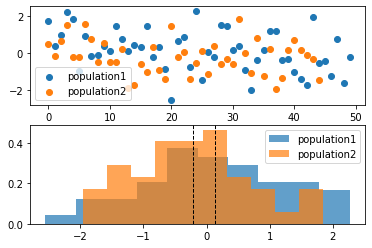

In [4]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [5]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=1.680399057852556, pvalue=0.09626493123724685)

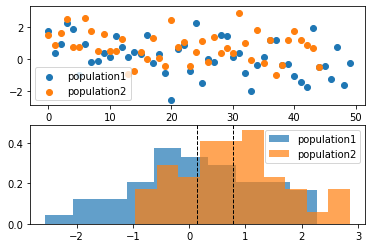

In [6]:
# Generate data with a bigger difference in means
population1, population2 = gendata(loc1=0, loc2=1)

In [7]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-3.029216121188858, pvalue=0.0031807310798192046)